In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("ultimate_data_challenge.json")

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [13]:
df[df.phone.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,NaN,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


# Plan

* Get column to determine classifier of active(1) or inactive(0) using the last date in last_trip_date
* Figure out what to do with NaN in ratings
* One hot encode city and phone
* Scale everything else 
* Use linear regression in scikit learn to try to predict this

### Create "active" column

In [20]:
df[df.last_trip_date.str.len() < 10]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver


In [24]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format="%Y-%m-%d")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int

In [28]:
df['active'] = (df['last_trip_date'] <= '2014-07-01') & (df['last_trip_date'] >= '2014-06-01')

In [29]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


### NaN ratings

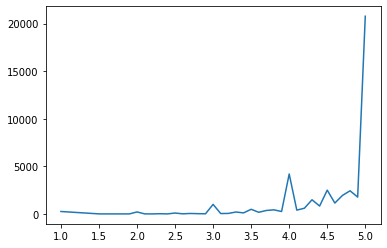

In [35]:
df['avg_rating_of_driver'].value_counts().sort_index().plot()

For simplicity and possibly ignorance sake use the mean of ratings to replace the NaN

In [15]:
# No correlation so we can't do much quickly
df[['avg_rating_of_driver', 'avg_rating_by_driver']].corr()

,avg_rating_of_driver,avg_rating_by_driver
avg_rating_of_driver,1.000000,0.123175
avg_rating_by_driver,0.123175,1.000000


In [38]:
mean_avg_rating_of_driver = df['avg_rating_of_driver'].mean()

In [40]:
mean_avg_rating_by_driver = df['avg_rating_by_driver'].mean()

In [41]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(mean_avg_rating_of_driver)
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(mean_avg_rating_by_driver)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  bool  

### Next one hot encode city and phone

In [45]:
df = df.join(pd.get_dummies(df.city))

In [48]:
df = df.join(pd.get_dummies(df.phone))

In [49]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,0,1,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,1,0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,1,0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True,0,1,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,0,0,1,1,0


In [50]:
df[(df['Android'] == 0) & (df['iPhone'] == 0)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,iPhone
134,King's Landing,0,2014-01-10,5.000000,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0,True,0,1,0,0,0
176,Astapor,0,2014-01-28,5.000000,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0,False,1,0,0,0,0
320,Astapor,1,2014-01-08,5.000000,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0,False,1,0,0,0,0
349,Winterfell,1,2014-01-06,3.300000,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0,True,0,0,1,0,0
389,King's Landing,5,2014-01-26,4.900000,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8,True,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.000000,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0,False,0,0,1,0,0
49627,Astapor,6,2014-01-05,5.000000,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5,False,1,0,0,0,0
49666,Winterfell,2,2014-01-22,4.601559,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0,False,0,0,1,0,0
49825,Astapor,0,2014-01-25,5.000000,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0,False,1,0,0,0,0


### Scale the numerical values

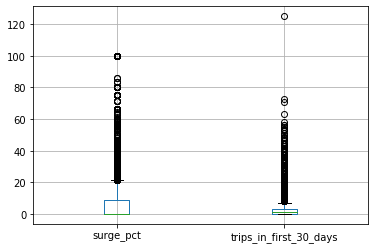

In [63]:
import seaborn as sns
df[['surge_pct', 'trips_in_first_30_days']].boxplot()

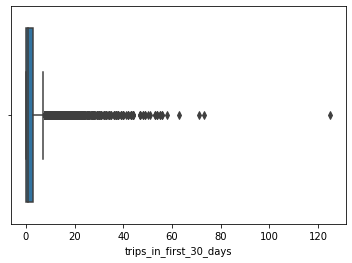

In [67]:
sns.boxplot(x=df['trips_in_first_30_days'])

### Lets find outliers

In [158]:
from scipy import stats

z_trips = np.abs(stats.zscore(df['trips_in_first_30_days']))


In [159]:
outliers = np.where(z_trips > 3)

In [161]:
len(df[df['trips_in_first_30_days'] > 10])

1772

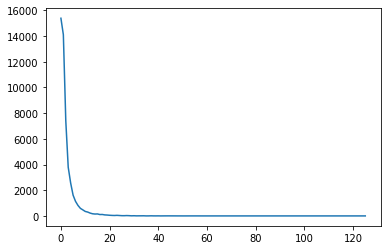

In [74]:
df['trips_in_first_30_days'].value_counts().sort_index().plot()

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
mm_scaler = MinMaxScaler()

In [85]:
df['trips_in_first_30_days_scaled'] = mm_scaler.fit_transform(df[['trips_in_first_30_days']])

In [88]:
df['avg_rating_of_driver_scaled'] = mm_scaler.fit_transform(df[['avg_rating_of_driver']])

In [89]:
df['avg_surge_scaled'] = mm_scaler.fit_transform(df[['avg_surge']])

In [90]:
df['surge_pct_scaled'] = mm_scaler.fit_transform(df[['surge_pct']])

In [91]:
df['weekday_pct_scaled'] = mm_scaler.fit_transform(df[['weekday_pct']])

In [92]:
df['avg_rating_by_driver_scaled'] = mm_scaler.fit_transform(df[['avg_rating_by_driver']])

In [93]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,...,King's Landing,Winterfell,Android,iPhone,trips_in_first_30_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_rating_by_driver_scaled
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,...,1,0,0,1,0.032,0.925,0.014286,0.154,0.462,1.000
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,...,0,0,1,0,0.000,1.000,0.000000,0.000,0.500,1.000
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,...,0,0,0,1,0.024,0.825,0.000000,0.000,1.000,1.000
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,...,1,0,0,1,0.072,0.900,0.020000,0.200,0.800,0.975
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,...,0,1,1,0,0.112,0.850,0.027143,0.118,0.824,0.975


In [94]:
scaled_columns = [col for col in df.columns if col.endswith("_scaled")]

In [97]:
model_columns = scaled_columns + ['ultimate_black_user', 'Astapor', "King's Landing", "Winterfell", 
                                  "Android", "iPhone", "active"]

In [98]:
df_model = df[model_columns]

In [118]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,...,King's Landing,Winterfell,Android,iPhone,trips_in_first_30_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_rating_by_driver_scaled
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,...,1,0,0,1,0.032,0.925,0.014286,0.154,0.462,1.000
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,...,0,0,1,0,0.000,1.000,0.000000,0.000,0.500,1.000
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,...,0,0,0,1,0.024,0.825,0.000000,0.000,1.000,1.000
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,...,1,0,0,1,0.072,0.900,0.020000,0.200,0.800,0.975
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,...,0,1,1,0,0.112,0.850,0.027143,0.118,0.824,0.975


In [123]:
df_model.iloc[45922]

trips_in_first_30_days_scaled          0
avg_rating_of_driver_scaled      0.90039
avg_surge_scaled                       0
surge_pct_scaled                       0
weekday_pct_scaled                     0
avg_rating_by_driver_scaled            1
ultimate_black_user                False
Astapor                                0
King's Landing                         0
Winterfell                             1
Android                                0
iPhone                                 1
active                             False
Name: 45922, dtype: object

# Model Formation

Classes aren't wonderfully balanced but are close

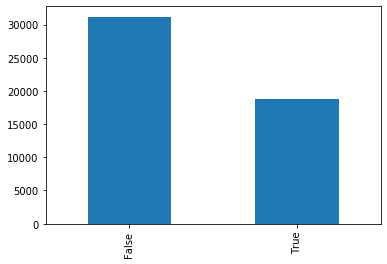

In [104]:
df_model['active'].value_counts().plot(kind="bar")

### Split the data

In [113]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_model.iloc[:,:-1], df.active, test_size=0.2, 
                                                    stratify=df.active, random_state=42)

In [122]:
X_train.head()

,trips_in_first_30_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_rating_by_driver_scaled,ultimate_black_user,Astapor,King's Landing,Winterfell,Android,iPhone
40147,0.000,0.90039,0.000000,0.000,0.000,1.000,True,0,1,0,0,1
45922,0.000,0.90039,0.000000,0.000,0.000,1.000,False,0,0,1,0,1
6707,0.024,0.70000,0.011429,0.167,0.333,0.925,False,0,1,0,0,1
5413,0.024,1.00000,0.000000,0.000,1.000,1.000,False,0,1,0,0,1
6925,0.008,0.37500,0.000000,0.000,0.929,0.825,False,0,0,1,0,1


In [124]:
y_train.head()

40147     True
45922    False
6707     False
5413     False
6925      True
Name: active, dtype: bool

In [101]:
from sklearn.linear_model import LogisticRegression

### Balance the classes 

In [127]:
lr = LogisticRegression(random_state=42).fit(X_train, y_train)

/Users/omni/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [128]:
lr.score(X_test, y_test)

0.7174

## Hyperparameter tuning

In [144]:
params = {
    'C': [0.1, 0.5, 0.74, 1.0, 5.0],
    #'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [154]:
lr = LogisticRegression(random_state=42)

In [155]:
gs_lr = GridSearchCV(lr, params, n_jobs=3).fit(X_train, y_train)

/Users/omni/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [156]:
gs_lr.best_estimator_

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
gs_lr.score(X_test, y_test)

0.7194